In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [2]:
xtrain=pd.read_csv("./Desktop/fashion-mnist_train.csv")
xtest=pd.read_csv("./Desktop/fashion-mnist_test.csv")
x_traini =np.array(xtrain)
x_testi =np.array(xtest)
x_train = x_traini[:,1:]
x_test =x_testi[:,1:]
x_train  = x_train/255.0
x_test = x_test/255.0
y_train  =x_traini[:,0]  
y_test  =x_testi[:,0]

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
np.unique(y_test,return_counts =True)#10 classes and it is a balanced split as the
# number of example in each class is same


(60000, 784)
(60000,)
(10000,)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [3]:
# We did this because Cnn basically accepts image so -1 for number of images
x_test =x_test.reshape((-1,28,28,1))
x_train = x_train.reshape((-1,28,28,1))
y_train = np_utils.to_categorical(y_train)
y_test =np_utils.to_categorical(y_test)
print(y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#10000 examples with 10 classes

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


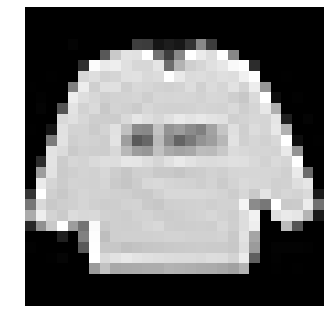

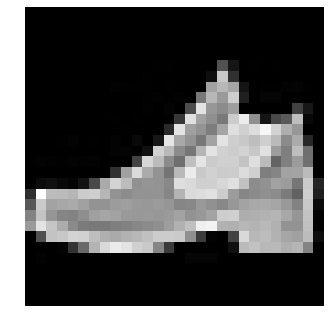

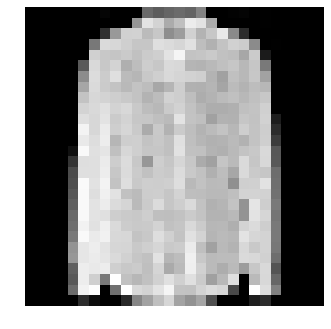

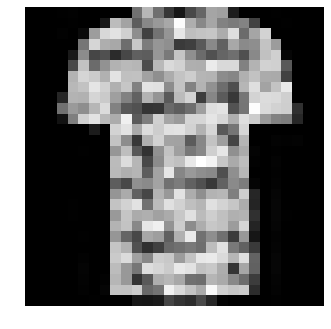

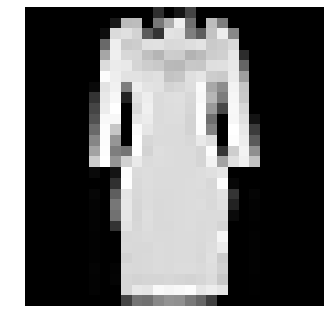

In [17]:


import matplotlib.pyplot as plt

plt.style.use("seaborn")
for i in range(5): 
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    #plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    #print(x_train[i].shape)
    plt.show()

In [5]:
##Cnn Model

In [6]:
model =Sequential()
#32 is the number of filters, size of filter is 3*3 ,activation is relu ,
#input is basically a image of shape 28*28*1
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
________________________________________________

In [7]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [8]:
hist=model.fit(x_train,y_train,epochs=20,shuffle=True,batch_size=512,validation_split=.20)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 143s 3ms/step - loss: 1.0674 - accuracy: 0.6137 - val_loss: 0.6227 - val_accuracy: 0.7758
Epoch 2/20
48000/48000 [==============================] - 141s 3ms/step - loss: 0.5368 - accuracy: 0.7987 - val_loss: 0.5008 - val_accuracy: 0.8268
Epoch 3/20
48000/48000 [==============================] - 145s 3ms/step - loss: 0.4487 - accuracy: 0.8394 - val_loss: 0.4380 - val_accuracy: 0.8512
Epoch 4/20
48000/48000 [==============================] - 147s 3ms/step - loss: 0.4048 - accuracy: 0.8556 - val_loss: 0.4194 - val_accuracy: 0.8556
Epoch 5/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.3736 - accuracy: 0.8667 - val_loss: 0.3910 - val_accuracy: 0.8687
Epoch 6/20
48000/48000 [==============================] - 146s 3ms/step - loss: 0.3511 - accuracy: 0.8737 - val_loss: 0.3655 - val_accuracy: 0.8746
Epoch 7/20
480

In [9]:
h =hist.history
print(h)

{'val_loss': [0.6227024207115174, 0.5008309019406637, 0.4379604467550913, 0.4194477511246999, 0.3910423100789388, 0.3655320042769114, 0.35776516890525817, 0.3381548313299815, 0.32831140716870627, 0.3159845867951711, 0.3143496868610382, 0.3023138846556346, 0.30439923667907715, 0.29526065214474995, 0.29552078326543174, 0.3010115557511647, 0.2891545517444611, 0.28396413842837015, 0.2786535536448161, 0.27595761744181313], 'val_accuracy': [0.7758333086967468, 0.8268333077430725, 0.8511666655540466, 0.8555833101272583, 0.8687499761581421, 0.8745833039283752, 0.8792499899864197, 0.8878333568572998, 0.8889166712760925, 0.8942499756813049, 0.8970000147819519, 0.8967499732971191, 0.8976666927337646, 0.8986666798591614, 0.8974999785423279, 0.8993333578109741, 0.9013333320617676, 0.9004166722297668, 0.9049999713897705, 0.9077500104904175], 'loss': [1.0673811955451966, 0.5368400311470032, 0.4486892681121826, 0.4047745773792267, 0.37363422926266987, 0.3510557963848114, 0.330630730231603, 0.321054434

In [10]:

import matplotlib.pyplot as plt

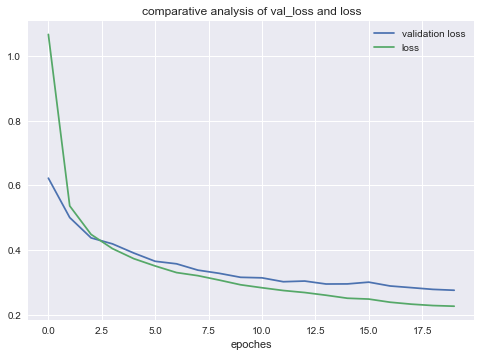

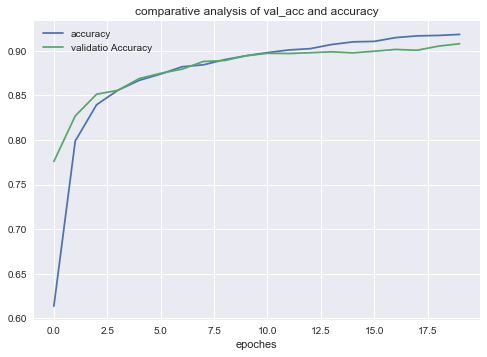

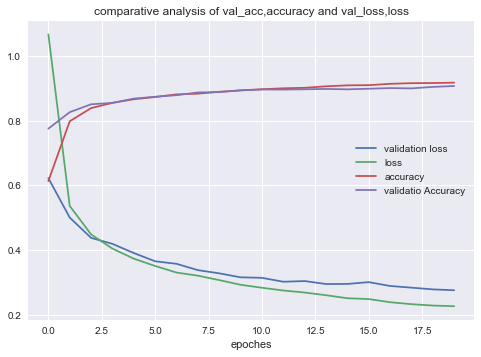

In [11]:
plt.style.use("seaborn")
plt.title("comparative analysis of val_loss and loss")
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label='loss')
plt.xlabel("epoches")
plt.legend()
plt.show()
plt.plot(h['accuracy'],label="accuracy")
plt.plot(h['val_accuracy'],label="validatio Accuracy")
plt.title("comparative analysis of val_acc and accuracy")
plt.xlabel("epoches")
plt.legend()
plt.show()
plt.title("")
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label='loss')
plt.plot(h['accuracy'],label="accuracy")
plt.plot(h['val_accuracy'],label="validatio Accuracy")
plt.title("comparative analysis of val_acc,accuracy and val_loss,loss")
plt.xlabel("epoches")
plt.legend()
plt.show()


In [12]:
model.evaluate(x_train,y_train)[1]


60000/60000 [==============================] - 40s 667us/step


0.9243000149726868

In [13]:
model.evaluate(x_test,y_test)[1]

10000/10000 [==============================] - 7s 679us/step


0.9111999869346619

In [14]:
fashion = {0:"T-shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneeker",8:"Bag",9:"Ankel Boot"}
import cv2
def prediction(r):
     print(fashion[r]+" class "+str(r))
def evaluate_model(path):
    fashion = {0:"T-shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneeker",8:"Bag",9:"Ankel Boot"}
    testingimage= cv2.imread(path)
    gray = cv2.cvtColor(testingimage, cv2.COLOR_BGR2GRAY)
    plt.style.use("seaborn")
    plt.imshow(gray,cmap='gray')
    plt.colorbar()
    plt.axis("off")
    final = cv2.resize(gray,(28,28))
    final_1 = final.reshape(-1,28,28,1)
    #print(final_1.shape)
    k = model.predict(final_1)
    result = np.argmax(k[0])
    #print(result)
    prediction(result)
    return result

Ankel Boot class 9


9

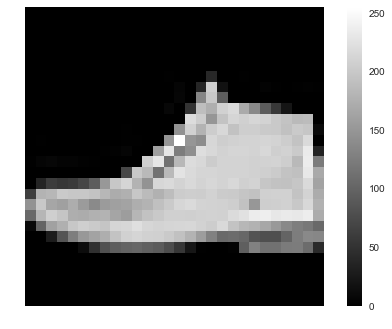

In [15]:
evaluate_model("./Desktop/fashion/img/fashion1232.png")

Ankel Boot class 9
Dress class 3
Dress class 3
Bag class 8
Shirt class 6
Coat class 4
Bag class 8
Coat class 4
Shirt class 6
Sandal class 5
Ankel Boot class 9
Dress class 3
T-shirt/Top class 0
Pullover class 2
Dress class 3
Pullover class 2
Coat class 4
Coat class 4
Bag class 8
Pullover class 2
Sandal class 5
Dress class 3
Shirt class 6
Coat class 4
Sneeker class 7
Pullover class 2
T-shirt/Top class 0
Pullover class 2
Pullover class 2
Sneeker class 7
Shirt class 6
Bag class 8
Trouser class 1
Sneeker class 7
Coat class 4
Bag class 8
Pullover class 2
Ankel Boot class 9
Trouser class 1
Ankel Boot class 9
Trouser class 1
Trouser class 1
Dress class 3
Sandal class 5
Bag class 8
Coat class 4
Coat class 4
Shirt class 6
Shirt class 6
Shirt class 6
Sneeker class 7
Ankel Boot class 9
Coat class 4
Shirt class 6
Trouser class 1
Ankel Boot class 9
Sandal class 5
Sandal class 5
Trouser class 1
Coat class 4
Shirt class 6
T-shirt/Top class 0
Bag class 8
Bag class 8
Pullover class 2
Trouser class 1
Shi

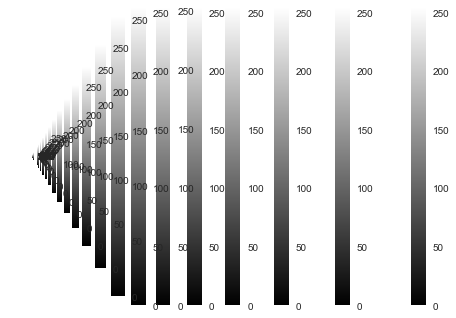

In [19]:
import os,shutil
from keras.preprocessing import image
import os
kwe = os.listdir("./Desktop/Finaldata")
for ix in kwe:
    imagen = image.load_img("./Desktop/Finaldata/"+ix,target_size=(28,28))
    imagen1 = "./Desktop/Finaldata/"+ix
    resultf = evaluate_model(imagen1)
    if resultf ==0:
        if not os.path.isdir("./Desktop/hur1/T-shirt"):
            os.mkdir("./Desktop/hur1/T-shirt")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/T-shirt/"+ix
            shutil.move(src,dest)  
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/T-shirt/"+ix
            shutil.move(src,dest)
    elif resultf ==1:
        if not os.path.isdir("./Desktop/hur1/Trouser"):
            os.mkdir("./Desktop/hur1/Trouser")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Trouser/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Trouser/"+ix
            shutil.move(src,dest)
    elif resultf ==2:
        if not os.path.isdir("./Desktop/hur1/Pullover"):
            os.mkdir("./Desktop/hur1/Pullover")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/pullover/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/pullover/"+ix
            shutil.move(src,dest)
    elif resultf ==3:
        if not os.path.isdir("./Desktop/hur1/Dress"):
            os.mkdir("./Desktop/hur1/Dress")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Dress/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Dress/"+ix
            shutil.move(src,dest)
    elif resultf ==4:
        if not os.path.isdir("./Desktop/hur1/Coat"):
            os.mkdir("./Desktop/hur1/coat")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/coat/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/coat/"+ix
            shutil.move(src,dest)
    elif resultf ==5:
        if not os.path.isdir("./Desktop/hur1/sandal"):
            os.mkdir("./Desktop/hur1/sandal")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/sandal/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/sandal/"+ix
            shutil.move(src,dest)
    elif resultf ==6:
        if not os.path.isdir("./Desktop/hur1/shirt"):
            os.mkdir("./Desktop/hur1/shirt")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/shirt/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/shirt/"+ix
            shutil.move(src,dest)
    elif resultf ==7:
        if not os.path.isdir("./Desktop/hur1/Sneaker"):
            os.mkdir("./Desktop/hur1/Sneaker")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Sneaker/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Sneaker/"+ix
            shutil.move(src,dest)
    elif resultf ==8:
        if not os.path.isdir("./Desktop/hur1/Bag"):
            os.mkdir("./Desktop/hur1/Bag")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Bag/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Bag/"+ix
            shutil.move(src,dest)
    elif resultf ==9:
        if not os.path.isdir("./Desktop/hur1/Boot"):
            os.mkdir("./Desktop/hur1/Boot")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Boot/"+ix
            shutil.move(src,dest)        
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Boot/"+ix
            shutil.move(src,dest)
   
    
    
    
    

In [18]:
 
if resultf ==0:
        if not os.path.isdir("./Desktop/hur1/T-shirt"):
            os.mkdir("./Desktop/hur1/T-shirt")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/T-shirt/"+ix
            shutil.move(src,dest)  
        else:
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/T-shirt/"+ix
            shutil.move(src,dest)
elif resultf ==1:
    if not os.path.isdir("./Desktop/hur1/Trouser"):
            os.mkdir("./Desktop/hur1/Trouser")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Trouser/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/Trouser/"+ix
        shutil.move(src,dest)
elif resultf ==2:
    if not os.path.isdir("./Desktop/hur1/Pullover"):
            os.mkdir("./Desktop/hur1/Pullover")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/pullover/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/pullover/"+ix
        shutil.move(src,dest)
elif resultf ==3:
    if not os.path.isdir("./Desktop/hur1/Dress"):
            os.mkdir("./Desktop/hur1/Dress")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Dress/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/Dress/"+ix
        shutil.move(src,dest)
elif resultf ==4:
    if not os.path.isdir("./Desktop/hur1/Coat"):
            os.mkdir("./Desktop/hur1/coat")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/coat/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/coat/"+ix
        shutil.move(src,dest)
elif resultf ==5:
    if not os.path.isdir("./Desktop/hur1/sandal"):
            os.mkdir("./Desktop/hur1/sandal")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/sandal/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/sandal/"+ix
        shutil.move(src,dest)
elif resultf ==6:
    if not os.path.isdir("./Desktop/hur1/shirt"):
            os.mkdir("./Desktop/hur1/shirt")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/shirt/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/shirt/"+ix
        shutil.move(src,dest)
elif resultf ==7:
    if not os.path.isdir("./Desktop/hur1/Sneaker"):
            os.mkdir("./Desktop/hur1/Sneaker")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Sneaker/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/Sneaker/"+ix
        shutil.move(src,dest)
elif resultf ==8:
    if not os.path.isdir("./Desktop/hur1/Bag"):
            os.mkdir("./Desktop/hur1/Bag")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Bag/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/Bag/"+ix
        shutil.move(src,dest)
elif resultf ==9:
    if not os.path.isdir("./Desktop/hur1/Boot"):
            os.mkdir("./Desktop/hur1/Boot")
            src = "./Desktop/Finaldata/"+ix
            dest = "./Desktop/hur1/Boot/"+ix
            shutil.move(src,dest)        
    else:
        src = "./Desktop/Finaldata/"+ix
        dest = "./Desktop/hur1/Boot/"+ix
        shutil.move(src,dest)
        
    

NameError: name 'resultf' is not defined

In [ ]:
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    k =np.array(gray)
    k11 = k.reshape(1,28,38,1)
    kqa = 

In [143]:
from PIL import Image
img = Image.open("./Desktop/fashion/img/fashion29110.png") #for example image size : 28x28x3
img1 = img.convert('L')  #convert a gray scale
print(img1.size)
y = np.expand_dims(img1, axis=-1)
y1 =y.reshape(-1,28,28,1)
print(y1.shape)

(28, 28)
(1, 28, 28, 1)


[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Bag class:8


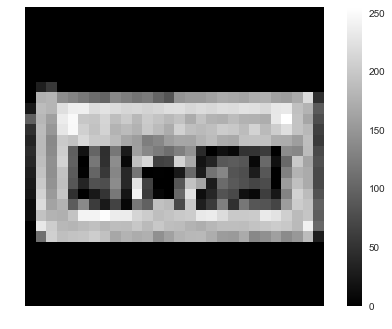

In [146]:
plt.style.use("seaborn-notebook")
plt.imshow(img,cmap='gray')
plt.colorbar()
print(k)
plt.axis("off")
k =model.predict(y1)
if k[0][0] == 1:
    print("T-shirt/Top"+" class:0")
elif k[0][1] == 1:
    print("Trouser"+" class:1")
elif k[0][2] == 1:
    print("Pullover"+" class:2")
elif k[0][3] == 1:
    print("Dress"+" class:3")
elif k[0][4] == 1:
    print("Coat"+" class:4")
elif k[0][5] == 1:
    print("Sandal"+" class:5")
elif k[0][6] == 1:
    print("Shirt"+" class:6")
elif k[0][7] == 1:
    print("Sneaker"+" class:7")
elif k[0][8] == 1:
    print("Bag"+" class:8")
elif k[0][9] == 1:
    print("AnkelBoot"+" class:9")


In [129]:

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

(1, 28, 28, 1)
3


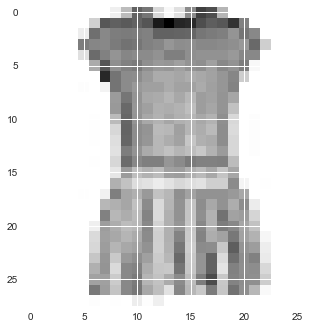

In [219]:

test12 = cv2.imread("./Desktop/fashion3.png")
gray = cv2.cvtColor(test12, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
final = cv2.resize(gray,(28,28))
final3 = final.reshape(-1,28,28,1)
print(final3.shape)
k = model.predict(final3)
print(np.argmax(k[0]))

In [40]:
hist.history?

In [36]:
model.fit?

In [66]:
print(image1.shape)

()
